In [1]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
print(ad.__version__)

0.7.8


In [2]:
import os

os.chdir('/scratch/Users/ativ2716/data/COVID_singlecell/PRJNA608742/alevin_indexk31_CB1_twoIFNAR2genes_withGeneNames_SRR11537949/alevin')

In [3]:
import scanpy as sc # import scanpy to handle our AnnData 

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.2 anndata==0.7.8 umap==0.5.2 numpy==1.19.5 scipy==1.5.4 pandas==0.24.2 scikit-learn==0.24.2 statsmodels==0.10.2 python-igraph==0.9.8 louvain==0.7.0


In [4]:
adata = sc.read_mtx("quants_mat.mtx.gz", dtype=np.float32)
print(adata)

AnnData object with n_obs × n_vars = 96221 × 59961


In [5]:
adata.X

<96221x59961 sparse matrix of type '<class 'numpy.float32'>'
	with 15073057 stored elements in Compressed Sparse Row format>

In [6]:
import csv
import gzip
import os
import scipy.io

matrix_dir = "/scratch/Users/ativ2716/data/COVID_singlecell/PRJNA608742/alevin_indexk31_CB1_twoIFNAR2genes_withGeneNames_SRR11537949/alevin"

# list of gene ids
genes_path = os.path.join(matrix_dir, "quants_mat_cols.txt.gz")
gene_ids = [row[0] for row in csv.reader(gzip.open(genes_path, mode="rt"), delimiter="\t")]
#print(gene_ids)

# list of cell barcodes
cells_path = os.path.join(matrix_dir, "quants_mat_rows.txt.gz")
cells_ids = [row[0] for row in csv.reader(gzip.open(cells_path, mode="rt"), delimiter="\t")]
#print(cells_ids)

In [7]:
adata.obs_names = cells_ids
adata.obs_names

/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/anndata/_core/anndata.py:875: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  names = self._prep_dim_index(names, "obs")


Index(['GTGTTAGAGTATTGGA', 'AGCTTGAGTCGACTAT', 'CGTAGGCGTACCGAGA',
       'CTAATGGAGAAACGAG', 'GCGCAACCAGGTTTCA', 'GGAAAGCAGGATCGCA',
       'AGTGGGAGTCACTGGC', 'CTCTACGAGTTACGGG', 'CGCCAAGTCGCTAGCG',
       'CTCAGAAAGCAACGGT',
       ...
       'AGTCTTTAGATGTCGG', 'AGATTGCCACTGAAGG', 'ATGACGGTCTTAACCT',
       'AGGTCCGAGAAACTGG', 'ACAGCTAGTTTAGCTG', 'ACACCGGTCCGTCAAA',
       'AACTCAGTCCAGAGGA', 'AACCGCGGTTAAGGGC', 'AAGCTTCATGCATGTA',
       'AAAGATGAGATCTGAA'],
      dtype='object', length=96221)

In [8]:
adata.var_names = gene_ids
adata.var_names

/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/anndata/_core/anndata.py:898: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  names = self._prep_dim_index(names, "var")


Index(['DDX11L1', 'WASH7P', 'MIR6859-1', 'MIR1302-2HG', 'MIR1302-2', 'FAM138A',
       'OR4G4P', 'OR4G11P', 'OR4F5', 'ENSG00000238009',
       ...
       'MT-ND4', 'MT-TH', 'MT-TS2', 'MT-TL2', 'MT-ND5', 'MT-ND6', 'MT-TE',
       'MT-CYB', 'MT-TT', 'MT-TP'],
      dtype='object', length=59961)

In [9]:
adata.var_names_make_unique()
adata

/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/anndata/_core/anndata.py:898: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  names = self._prep_dim_index(names, "var")


AnnData object with n_obs × n_vars = 96221 × 59961

normalizing counts per cell
    finished (0:00:00)


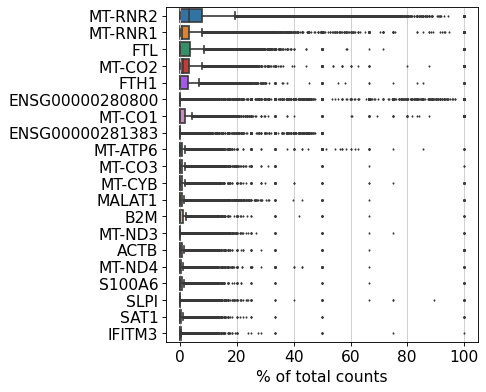

In [10]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [11]:
# Perform some basic filtering

qc = sc.pp.calculate_qc_metrics(adata)# this returns a tuple of (cell_qc_dataframe, gene_qc_dataframe)
                                
cell_qc_dataframe = qc[0]
gene_qc_dataframe = qc[1]

print('This is the cell quality control dataframe:')
print(cell_qc_dataframe.head(5))

print('\n\n\n\nThis is the gene quality control dataframe:')
print(gene_qc_dataframe.head(5))

/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 6103. The TBB threading layer is disabled.
  warnings.warn(problem)


This is the cell quality control dataframe:
                  n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
GTGTTAGAGTATTGGA               8502                 9.048174  71509.000000   
AGCTTGAGTCGACTAT               7558                 8.930494  73159.992188   
CGTAGGCGTACCGAGA               7879                 8.972083  76258.000000   
CTAATGGAGAAACGAG               9104                 9.116579  78167.000000   
GCGCAACCAGGTTTCA               8753                 9.077266  76089.000000   

                  log1p_total_counts  pct_counts_in_top_50_genes  \
GTGTTAGAGTATTGGA           11.177592                   30.462059   
AGCTTGAGTCGACTAT           11.200418                   33.953132   
CGTAGGCGTACCGAGA           11.241891                   30.202439   
CTAATGGAGAAACGAG           11.266616                   26.553425   
GCGCAACCAGGTTTCA           11.239672                   30.007728   

                  pct_counts_in_top_100_genes  pct_counts_in_top_200_genes  \


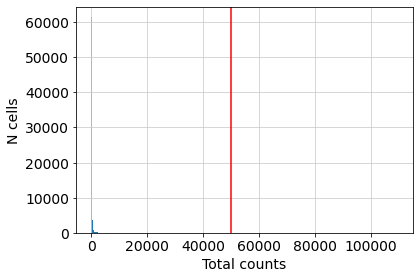

In [12]:
# time for some cell quality control
import scanpy as sc # import scanpy to handle our AnnData 
import pandas as pd # import pandas to handle dataframes
import matplotlib.pyplot as plt # import matplotlib to visualize our qc metrics

# magic incantation to help matplotlib work with our jupyter notebook
%matplotlib inline 

# Library Size QC
# consider the total number of reads detected per cell
# cells with few reads are likely to have been broken or failed to capture a cell, and should be removed.

plt.hist(cell_qc_dataframe['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('N cells')
plt.axvline(50000, color='red')

(0.0, 1000.0)

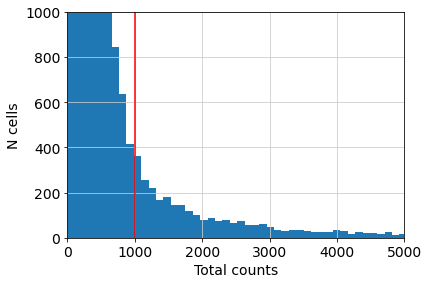

In [13]:
# zoom in to the cells with fewer reads

plt.hist(cell_qc_dataframe['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('N cells')
plt.axvline(1000, color='red')
plt.xlim(0,5000)
plt.ylim(0,1000)

In [14]:
# remove cells with fewer than 1000 reads
print('Started with: \n', adata)
sc.pp.filter_cells(adata, min_counts = 1000)
print('Finished with: \n', adata)

filtered out 91785 cells that have less than 1000 counts


Started with: 
 AnnData object with n_obs × n_vars = 96221 × 59961
Finished with: 
 AnnData object with n_obs × n_vars = 4436 × 59961
    obs: 'n_counts'


(0.0, 2000.0)

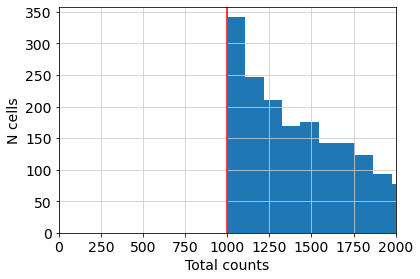

In [15]:
# replot to check that the filter worked
qc = sc.pp.calculate_qc_metrics(adata)
cell_qc_dataframe = qc[0]
gene_qc_dataframe = qc[1]

plt.hist(cell_qc_dataframe['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('N cells')
plt.axvline(1000, color='red')
plt.xlim(0,2000) 

(0.0, 500.0)

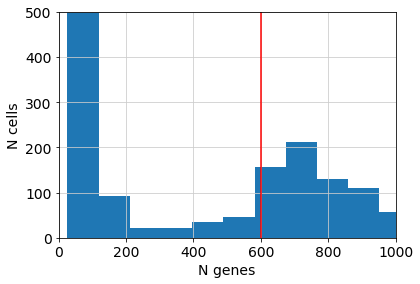

In [16]:
# Detected Genes QC
# also want to make sure that reads are distributed across the transcriptome
# e.g. count the total number of unique genes detected in each sample
plt.hist(cell_qc_dataframe['n_genes_by_counts'], bins=100)
plt.xlabel('N genes')
plt.ylabel('N cells')
plt.axvline(600, color='red')
plt.xlim(0,1000) 
plt.ylim(0,500) 

In [17]:
# filter cells with fewer than 600 genes detected
print('Started with: \n', adata)
sc.pp.filter_cells(adata, min_genes = 600)
print('Finished with: \n', adata)

filtered out 1879 cells that have less than 600 genes expressed


Started with: 
 AnnData object with n_obs × n_vars = 4436 × 59961
    obs: 'n_counts'
Finished with: 
 AnnData object with n_obs × n_vars = 2557 × 59961
    obs: 'n_counts', 'n_genes'


In [18]:
# next, remove genes or TEs whose expression level is considered "undetectable"
# we define a gene as detectable if at least two cells contain more than 5 reads from the gene
# but the threshold strongly depends on the sequencing depth
# note! genes must be filtered AFTER cell filtering since some genes may only be detected in poor quality cells

# filter genes
# e.g. set the threshold to be at least 2 cells with at least 5 reads

print('Started with: \n', adata)
sc.pp.filter_genes(adata, min_cells = 2)
sc.pp.filter_genes(adata, min_counts = 5)
print('Finished with: \n', adata)

filtered out 31899 genes that are detected in less than 2 cells
filtered out 4408 genes that are detected in less than 5 counts


Started with: 
 AnnData object with n_obs × n_vars = 2557 × 59961
    obs: 'n_counts', 'n_genes'
Finished with: 
 AnnData object with n_obs × n_vars = 2557 × 23654
    obs: 'n_counts', 'n_genes'
    var: 'n_cells', 'n_counts'


In [19]:
# Next, let's assemble some information about mitochondrial genes, which are important for quality control.
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'

In [20]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/anndata/_core/anndata.py:1218: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


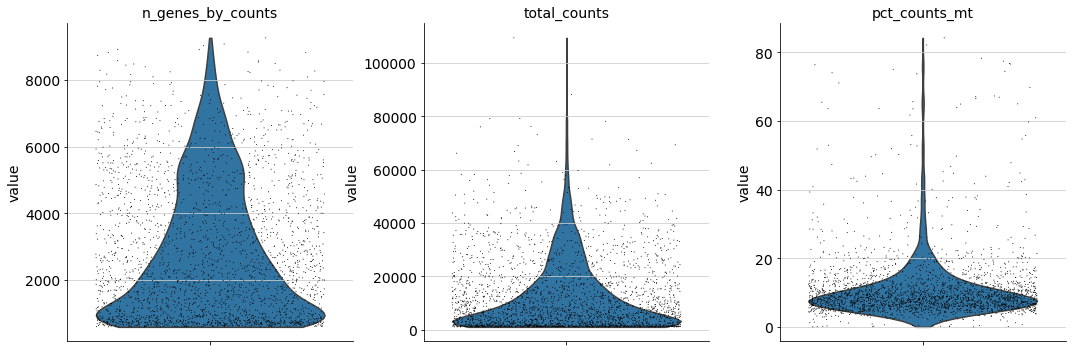

In [21]:
# Make a violin plot of some of the computed quality measures:
# the number of genes expressed in the count matrix
# the total counts per cell
# the percentage of counts in mitochondrial genes

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/anndata/_core/anndata.py:1218: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


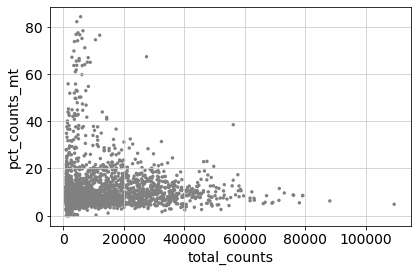

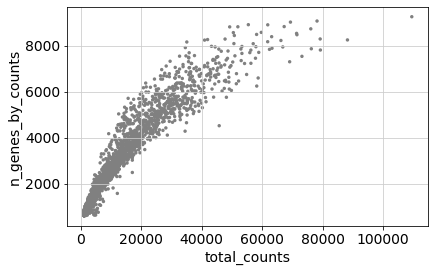

In [22]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [23]:
# Remove cells that have too many mitochondrial genes expressed or too many total counts
print('Started with: \n', adata)
adata = adata[adata.obs.n_genes_by_counts < 10000, :]
print('After removing cells with too many total counts: \n', adata)
adata = adata[adata.obs.pct_counts_mt < 20, :]
print('After removing cells with too many total counts: \n', adata)

Started with: 
 AnnData object with n_obs × n_vars = 2557 × 23654
    obs: 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
After removing cells with too many total counts: 
 View of AnnData object with n_obs × n_vars = 2557 × 23654
    obs: 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
After removing cells with too many total counts: 
 View of AnnData object with n_obs × n_vars = 2341 × 23654
    obs: 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'


In [24]:
# print the final dimensions of the QC's dataset
print(adata) 
# AnnData object with n_obs × n_vars = 2341 × 23654

# save the filtered anndata
adata.write('adata_qc.h5ad')

View of AnnData object with n_obs × n_vars = 2341 × 23654
    obs: 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'


/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/anndata/_core/anndata.py:1218: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


In [25]:
##############################################################
# NORMALIZATION AND ISOFORM EXPRESSION RATIO CALCULATION

# reload the qc'd data
import scanpy as sc
adata = sc.read('adata_qc.h5ad')

#?sc.pl.pca_overview

computing PCA
    with n_comps=50
    finished (0:00:19)
/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/anndata/_core/anndata.py:1218: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


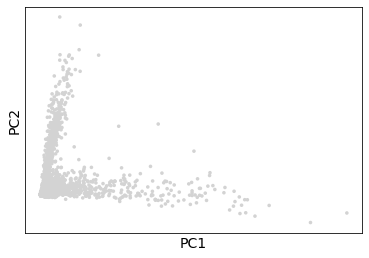

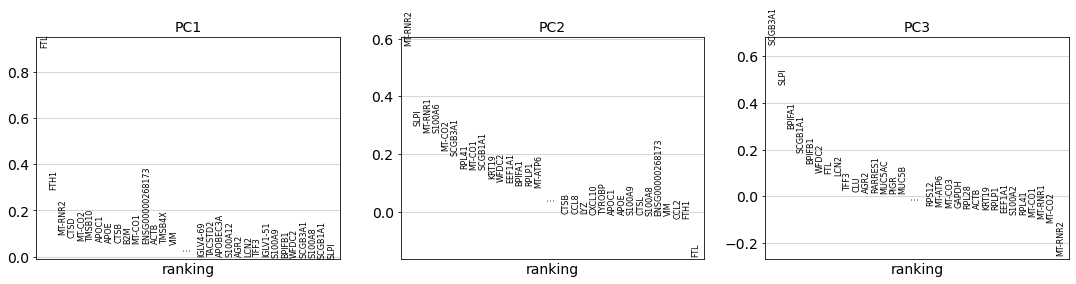

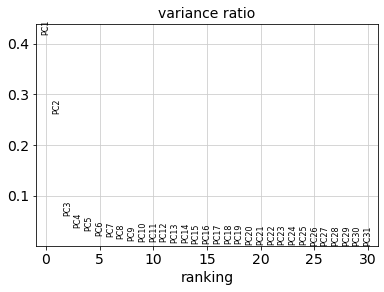

In [26]:
# take a look at the data before normalizing
sc.pp.pca(adata)
sc.pl.pca_overview(adata)

In [27]:
# Total-count normalize (library-size correct) the data matrix 𝐗 to 10,000 reads per cell
# so that counts become comparable among cells
# Note: the choice of target_sum doesnt have much of an effect as its just a general scaling of the entire dataset. 
# People often choose 10,000, or the median number of counts per cell.

sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [28]:
adata.write('adata_normalized.h5ad')

/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/anndata/_core/anndata.py:1218: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


In [29]:
# save normalized counts as a csv so I can add the expression ratio of short to long
adata.write_csvs("adata_normalized.csv", skip_data=False)

writing .csv files to adata_normalized


In [30]:
%%bash

cd adata_normalized
cat obs.csv | grep -v total_counts | awk -F "," '{print $1}' | paste - X.csv | tr "\t" "," > X_with_cellbarcodes.csv
cat var.csv | grep -v total_counts | awk -F "," '{print $1}' | tr "\n" "," | sed 's/MT-CYB,/MT-CYB\n/g' | cat - X_with_cellbarcodes.csv > X_with_cellbarcodes_and_genes.csv
cd ..

In [31]:
# read in the normalized counts, with the gene names and cell barcodes included
normcounts = pd.read_csv('adata_normalized/X_with_cellbarcodes_and_genes.csv', header=0, index_col=0)

In [32]:
# check that it looks right
print(normcounts.head(2))

                    WASH7P  ENSG00000238009  ENSG00000268903  ENSG00000269981  \
GTGTTAGAGTATTGGA  0.000000              0.0         0.000000              0.0   
AGCTTGAGTCGACTAT  0.473653              0.0         0.136732              0.0   

                  ENSG00000241860    WASH9P  ENSG00000228463  ENSG00000237094  \
GTGTTAGAGTATTGGA              0.0  0.000000           0.1399              0.0   
AGCTTGAGTCGACTAT              0.0  0.173369           0.0000              0.0   

                  ENSG00000250575  ENSG00000230021  ...     MT-CO2    MT-ATP8  \
GTGTTAGAGTATTGGA              0.0              0.0  ...  159.06609  21.124939   
AGCTTGAGTCGACTAT              0.0              0.0  ...  157.65097  32.131958   

                   MT-ATP6     MT-CO3     MT-ND3    MT-ND4L     MT-ND4  \
GTGTTAGAGTATTGGA  43.15604  40.569164  28.679552  17.907232  24.622444   
AGCTTGAGTCGACTAT  60.05581  58.657913  47.582640  22.150540  29.259950   

                    MT-ND5    MT-ND6     MT-C

In [37]:
print(normcounts.shape)
print(normcounts[['IFNAR1', 'IFNAR2-short', 'IFNAR2-long']].head(10))

(2341, 23655)
                    IFNAR1  IFNAR2-short  IFNAR2-long
GTGTTAGAGTATTGGA  0.419701      0.279801     0.000000
AGCTTGAGTCGACTAT  0.136732      0.045577     0.045577
CGTAGGCGTACCGAGA  0.262326      0.131163     0.131163
CTAATGGAGAAACGAG  0.511954      0.063994     0.063994
GCGCAACCAGGTTTCA  0.262935      0.000000     0.000000
GGAAAGCAGGATCGCA  0.252620      0.000000     0.252620
AGTGGGAGTCACTGGC  0.126202      0.000000     0.000000
CTCTACGAGTTACGGG  0.226765      0.000000     0.000000
CGCCAAGTCGCTAGCG  0.432678      0.072113     0.072113
CTCAGAAAGCAACGGT  0.365375      0.000000     0.000000


In [36]:
# add in a column which is normalized-short isofrom divided by normalized-long isoform
normcounts['ShortVsLongRatio'] = normcounts['IFNAR2-short']/normcounts['IFNAR2-long']
print(normcounts.shape)
print(normcounts[['IFNAR1', 'IFNAR2-short', 'IFNAR2-long', 'ShortVsLongRatio']].head(10))

(2341, 23655)
                    IFNAR1  IFNAR2-short  IFNAR2-long  ShortVsLongRatio
GTGTTAGAGTATTGGA  0.419701      0.279801     0.000000               inf
AGCTTGAGTCGACTAT  0.136732      0.045577     0.045577               1.0
CGTAGGCGTACCGAGA  0.262326      0.131163     0.131163               1.0
CTAATGGAGAAACGAG  0.511954      0.063994     0.063994               1.0
GCGCAACCAGGTTTCA  0.262935      0.000000     0.000000               NaN
GGAAAGCAGGATCGCA  0.252620      0.000000     0.252620               0.0
AGTGGGAGTCACTGGC  0.126202      0.000000     0.000000               NaN
CTCTACGAGTTACGGG  0.226765      0.000000     0.000000               NaN
CGCCAAGTCGCTAGCG  0.432678      0.072113     0.072113               1.0
CTCAGAAAGCAACGGT  0.365375      0.000000     0.000000               NaN


In [52]:
# add 0.000001 to both IFNAR2 isoforms
# then try calculating the expression ratio again
normcounts['IFNAR2-short-edited'] = normcounts['IFNAR2-short']+0.01
normcounts['IFNAR2-long-edited'] = normcounts['IFNAR2-long']+0.01
normcounts['ShortVsLongRatio'] = normcounts['IFNAR2-short-edited']/normcounts['IFNAR2-long-edited']
print(normcounts.shape)
print(normcounts[['IFNAR2-short', 'IFNAR2-short-edited', 'IFNAR2-long', 'IFNAR2-long-edited', 'ShortVsLongRatio']].head(10))

(2341, 23657)
                  IFNAR2-short  IFNAR2-short-edited  IFNAR2-long  \
GTGTTAGAGTATTGGA      0.279801             0.289801     0.000000   
AGCTTGAGTCGACTAT      0.045577             0.055577     0.045577   
CGTAGGCGTACCGAGA      0.131163             0.141163     0.131163   
CTAATGGAGAAACGAG      0.063994             0.073994     0.063994   
GCGCAACCAGGTTTCA      0.000000             0.010000     0.000000   
GGAAAGCAGGATCGCA      0.000000             0.010000     0.252620   
AGTGGGAGTCACTGGC      0.000000             0.010000     0.000000   
CTCTACGAGTTACGGG      0.000000             0.010000     0.000000   
CGCCAAGTCGCTAGCG      0.072113             0.082113     0.072113   
CTCAGAAAGCAACGGT      0.000000             0.010000     0.000000   

                  IFNAR2-long-edited  ShortVsLongRatio  
GTGTTAGAGTATTGGA            0.010000         28.980050  
AGCTTGAGTCGACTAT            0.055577          1.000000  
CGTAGGCGTACCGAGA            0.141163          1.000000  
CTAATGGAG

In [53]:
# delete the IFNAR2-short/long-edited columns
del normcounts['IFNAR2-short-edited']
print(normcounts.shape)
del normcounts['IFNAR2-long-edited']
print(normcounts.shape)
print(normcounts[['IFNAR2-short','IFNAR2-long','ShortVsLongRatio']].head(10))

(2341, 23656)
(2341, 23655)
                  IFNAR2-short  IFNAR2-long  ShortVsLongRatio
GTGTTAGAGTATTGGA      0.279801     0.000000         28.980050
AGCTTGAGTCGACTAT      0.045577     0.045577          1.000000
CGTAGGCGTACCGAGA      0.131163     0.131163          1.000000
CTAATGGAGAAACGAG      0.063994     0.063994          1.000000
GCGCAACCAGGTTTCA      0.000000     0.000000          1.000000
GGAAAGCAGGATCGCA      0.000000     0.252620          0.038078
AGTGGGAGTCACTGGC      0.000000     0.000000          1.000000
CTCTACGAGTTACGGG      0.000000     0.000000          1.000000
CGCCAAGTCGCTAGCG      0.072113     0.072113          1.000000
CTCAGAAAGCAACGGT      0.000000     0.000000          1.000000


In [55]:
adata = sc.AnnData(X = normcounts)
print(adata)

AnnData object with n_obs × n_vars = 2341 × 23655


In [59]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:20)


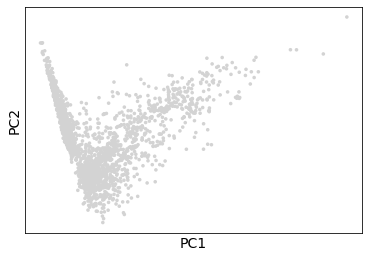

In [60]:
sc.pl.pca(adata)

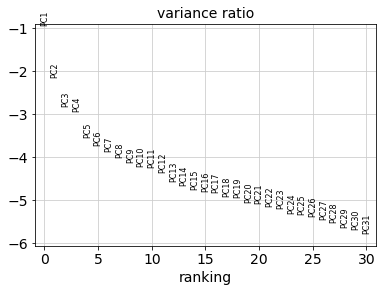

In [61]:
sc.pl.pca_variance_ratio(adata, log=True)

In [62]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


In [63]:
#sc.tl.umap(adata)
sc.tl.umap(adata, min_dist=0.6, spread=1, random_state=0, n_components=2, maxiter=100)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


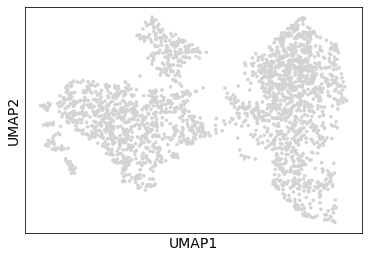

AnnData object with n_obs × n_vars = 2341 × 23655
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


In [64]:
sc.pl.umap(adata)
print(adata)

computing score 'ISG-score'
    finished: added
    'ISG-score', score of gene set (adata.obs).
    11 total control genes are used. (0:00:00)
/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/anndata/_core/anndata.py:1218: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


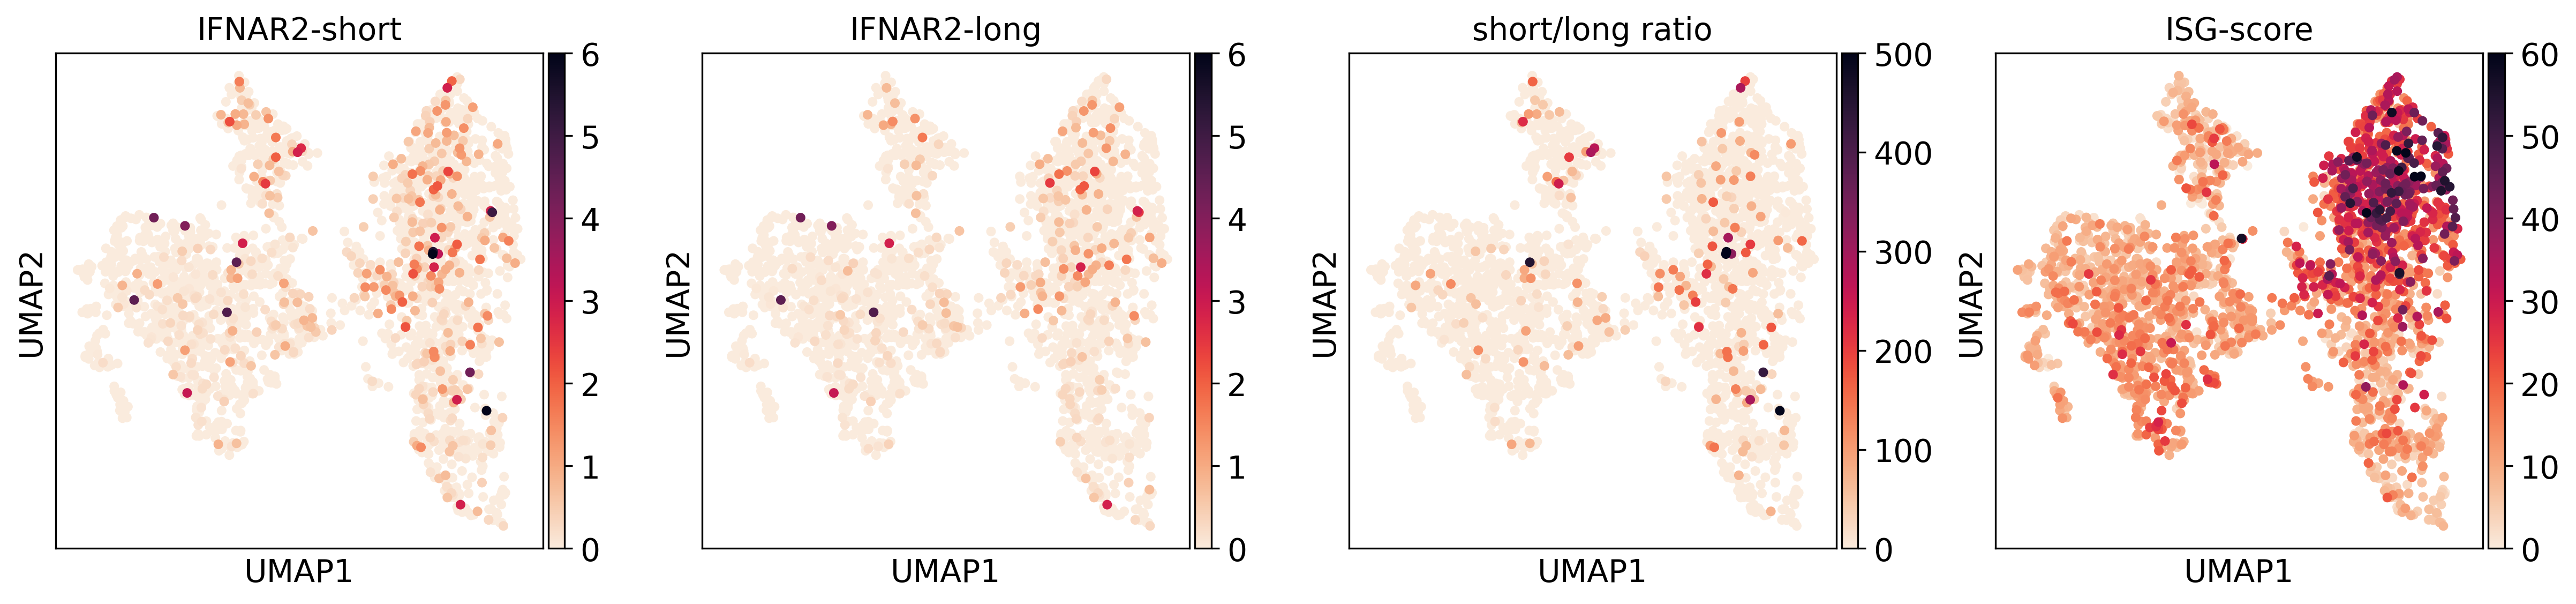

In [74]:
# Add colors for gene expression
import seaborn as sns
sc.settings.set_figure_params(dpi=300, facecolor='white')

sc.tl.score_genes(adata, ["MT2A", "ISG15", "LY6E", "IFIT1", "IFIT2", "IFIT3", "IFITM1", "IFITM3", "IFI44L", "IFI6", "MX1", "IFI27"], score_name='ISG-score', ctrl_size=12)
sc.pl.umap(adata, color=["IFNAR2-short","IFNAR2-long", "ShortVsLongRatio", "ISG-score"], title=["IFNAR2-short","IFNAR2-long", "short/long ratio", "ISG-score"], size=75, color_map="rocket_r", vmin=0, vmax=[6,6,500,60])

In [114]:
################################################################################
# OR, NORMALIZATION, PCA & CLUSTERING WITHOUT THE ISOFORM EXPRESSION RATIO

# reload the qc'd data
import scanpy as sc
adata = sc.read('adata_normalized.h5ad')
print(adata.X)

  (0, 6)	0.13990025
  (0, 11)	1.7357116
  (0, 12)	0.15182969
  (0, 13)	0.2802927
  (0, 15)	10.145956
  (0, 16)	0.5615109
  (0, 24)	0.13990025
  (0, 25)	0.13990025
  (0, 26)	0.2798005
  (0, 29)	3.917207
  (0, 30)	11.05212
  (0, 32)	1.119202
  (0, 35)	0.41970074
  (0, 36)	0.13990025
  (0, 40)	0.41970074
  (0, 42)	1.119202
  (0, 43)	0.2798005
  (0, 45)	0.41970074
  (0, 49)	0.2798005
  (0, 50)	0.2798005
  (0, 51)	0.6995013
  (0, 53)	2.0985038
  (0, 54)	1.119202
  (0, 56)	1.5389028
  (0, 58)	0.41970074
  :	:
  (2340, 22976)	9.832842
  (2340, 23006)	39.331367
  (2340, 23015)	1.4046903
  (2340, 23227)	9.832842
  (2340, 23233)	9.832842
  (2340, 23264)	29.498526
  (2340, 23290)	9.832842
  (2340, 23293)	9.832842
  (2340, 23294)	9.832842
  (2340, 23297)	9.832842
  (2340, 23308)	9.832842
  (2340, 23447)	19.665684
  (2340, 23479)	9.832842
  (2340, 23589)	29.498526
  (2340, 23628)	2.4582105
  (2340, 23639)	19.665684
  (2340, 23640)	29.498526
  (2340, 23642)	19.665684
  (2340, 23643)	78.662735
  (234

In [115]:
# Logarithmize the data
sc.pp.log1p(adata)
print(adata.X)

  (0, 6)	0.13094077
  (0, 11)	1.0063915
  (0, 12)	0.14135171
  (0, 13)	0.24708872
  (0, 15)	2.4110768
  (0, 16)	0.4456539
  (0, 24)	0.13094077
  (0, 25)	0.13094077
  (0, 26)	0.2467042
  (0, 29)	1.5927407
  (0, 30)	2.4892406
  (0, 32)	0.7510396
  (0, 35)	0.3504461
  (0, 36)	0.13094077
  (0, 40)	0.3504461
  (0, 42)	0.7510396
  (0, 43)	0.2467042
  (0, 45)	0.3504461
  (0, 49)	0.2467042
  (0, 50)	0.2467042
  (0, 51)	0.53033483
  (0, 53)	1.1309193
  (0, 54)	0.7510396
  (0, 56)	0.931732
  (0, 58)	0.3504461
  :	:
  (2340, 22976)	2.3825824
  (2340, 23006)	3.6971295
  (2340, 23015)	0.87742114
  (2340, 23227)	2.3825824
  (2340, 23233)	2.3825824
  (2340, 23264)	3.4176784
  (2340, 23290)	2.3825824
  (2340, 23293)	2.3825824
  (2340, 23294)	2.3825824
  (2340, 23297)	2.3825824
  (2340, 23308)	2.3825824
  (2340, 23447)	3.0284746
  (2340, 23479)	2.3825824
  (2340, 23589)	3.4176784
  (2340, 23628)	1.2407513
  (2340, 23639)	3.0284746
  (2340, 23640)	3.4176784
  (2340, 23642)	3.0284746
  (2340, 23643)	4.37

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


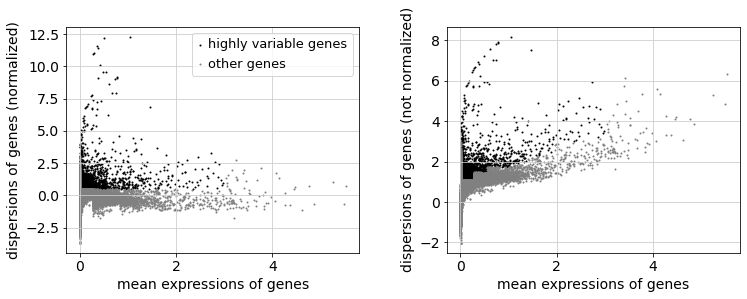

In [116]:
# Identify highly-variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

# The result of the highly-variable-genes detection is stored as an annotation in .var.highly_variable 
# and auto-detected by PCA and hence, sc.pp.neighbors and subsequent manifold/graph tools. 
# So actually doing the filtering is unnecessary

In [117]:
# Set the .raw attribute of the AnnData object to the normalized and logarithmized raw gene expression 
# for later use in differential testing and visualizations of gene expression.
# This simply freezes the state of the AnnData object.
adata.raw = adata

In [118]:
adata

AnnData object with n_obs × n_vars = 2341 × 23654
    obs: 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'log1p', 'hvg'
    obsm: 'X_pca'
    varm: 'PCs'

In [119]:
adata.write('adata_normalizedAndLogTransformed.h5ad')

/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/anndata/_core/anndata.py:1218: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


In [120]:
# Next steps (scaling and correction) are optional
adata = sc.read('adata_normalizedAndLogTransformed.h5ad')

In [121]:
# Perform correction by reegressing out effects of 
# total counts per cell and the percentage of mitochondrial genes expressed. 
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/anndata/_core/anndata.py:1218: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"
    finished (0:01:55)


In [122]:
adata

AnnData object with n_obs × n_vars = 2341 × 23654
    obs: 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [123]:
# Scale each gene to unit variance
sc.pp.scale(adata)

In [124]:
adata

AnnData object with n_obs × n_vars = 2341 × 23654
    obs: 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [125]:
# Reduce the dimensionality of the data by running principal component analysis (PCA), 
# which reveals the main axes of variation and denoises the data.
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:06)


/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/anndata/_core/anndata.py:1218: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


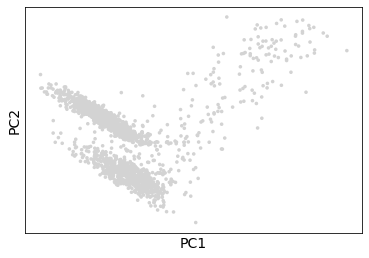

In [126]:
# Make a scatter plot of the PCA values 
sc.pl.pca(adata)

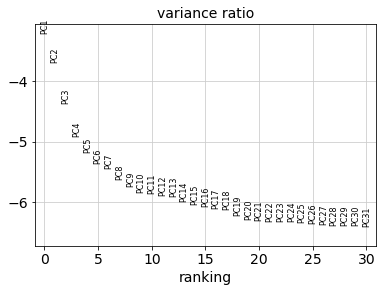

In [127]:
# Inspect the contribution of single PCs to the total variance in the data
# This gives us information about how many PCs we should consider 
# in order to compute the neighborhood relations of cells e.g. for tSNEs
# Often a rough estimate of the number of PCs does fine
sc.pl.pca_variance_ratio(adata, log=True)

In [128]:
adata.write('adata_normalizedAndLogTransformedAndScaled.h5ad')

/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/anndata/_core/anndata.py:1218: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


In [129]:
adata

AnnData object with n_obs × n_vars = 2341 × 23654
    obs: 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [130]:
## Dimensionality reduction

import scanpy as sc
adata = sc.read('adata_normalizedAndLogTransformedAndScaled.h5ad')

In [131]:
adata

AnnData object with n_obs × n_vars = 2341 × 23654
    obs: 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [132]:
# compute the neighborhood graph of cells using the PCA representation of the data matrix
# you can use default values, or the below will replicate seurat defaults
# UMAP is based on the neighbor graph; so this needs to be computed first
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


In [133]:
# embed the neighborhood graph in two dimensions using UMAP
# usually more faithful to the global connectivity of the manifold than tSNE

#sc.tl.umap(adata)
sc.tl.umap(adata, min_dist=0.6, spread=1, random_state=0, n_components=2, maxiter=100)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/anndata/_core/anndata.py:1218: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


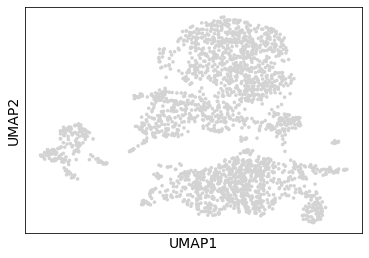

AnnData object with n_obs × n_vars = 2341 × 23654
    obs: 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


In [134]:
sc.pl.umap(adata)
print(adata)
adata.write('adata_embeddings.h5ad')

In [ ]:
# Can also draw out the tSNE

# sc.tl.tsne(adata, perplexity=30, learning_rate=1000, random_state=0)
# sc.pl.tsne(adata)

In [135]:
### Clustering

import scanpy as sc
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from matplotlib import pyplot as plt
%matplotlib inline

adata = sc.read('adata_embeddings.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 2341 × 23654
    obs: 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/anndata/_core/anndata.py:1218: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


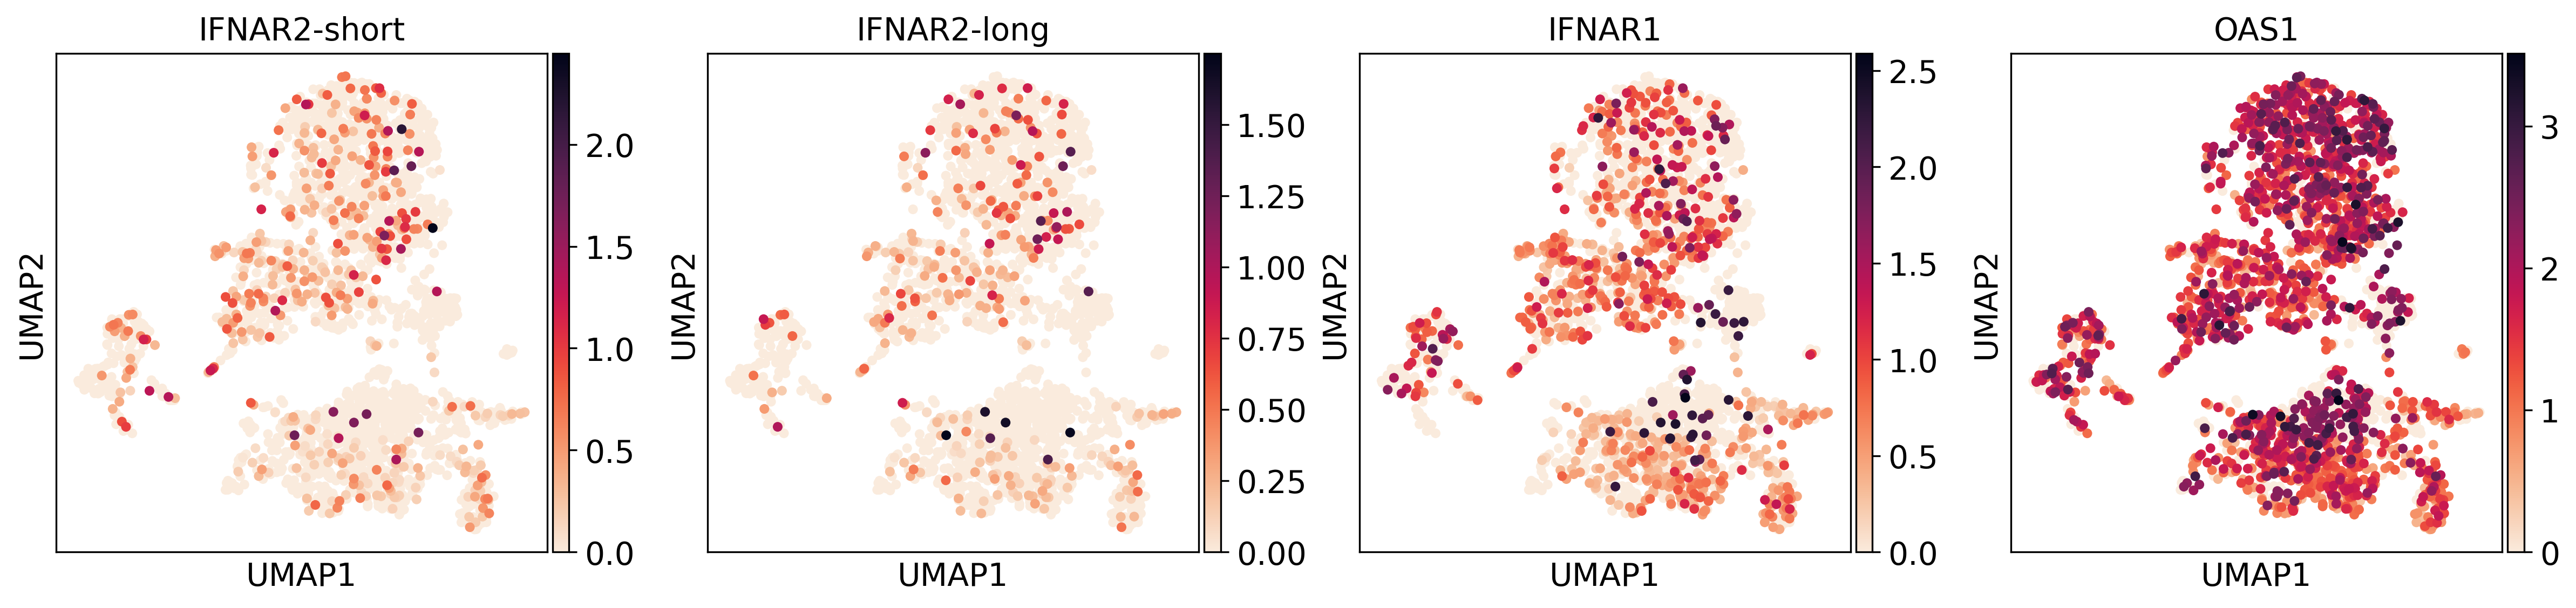

In [136]:
# Add colors for gene expression
import seaborn as sns
sc.settings.set_figure_params(dpi=300, facecolor='white')

sc.pl.umap(adata, color=["IFNAR2-short","IFNAR2-long", "IFNAR1","OAS1"], size=75, color_map="rocket_r", vmin=0)
# note: As we set the .raw attribute of adata, 
# this plot will show the “raw” (normalized, logarithmized, but uncorrected) gene expression

/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/anndata/_core/anndata.py:1218: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


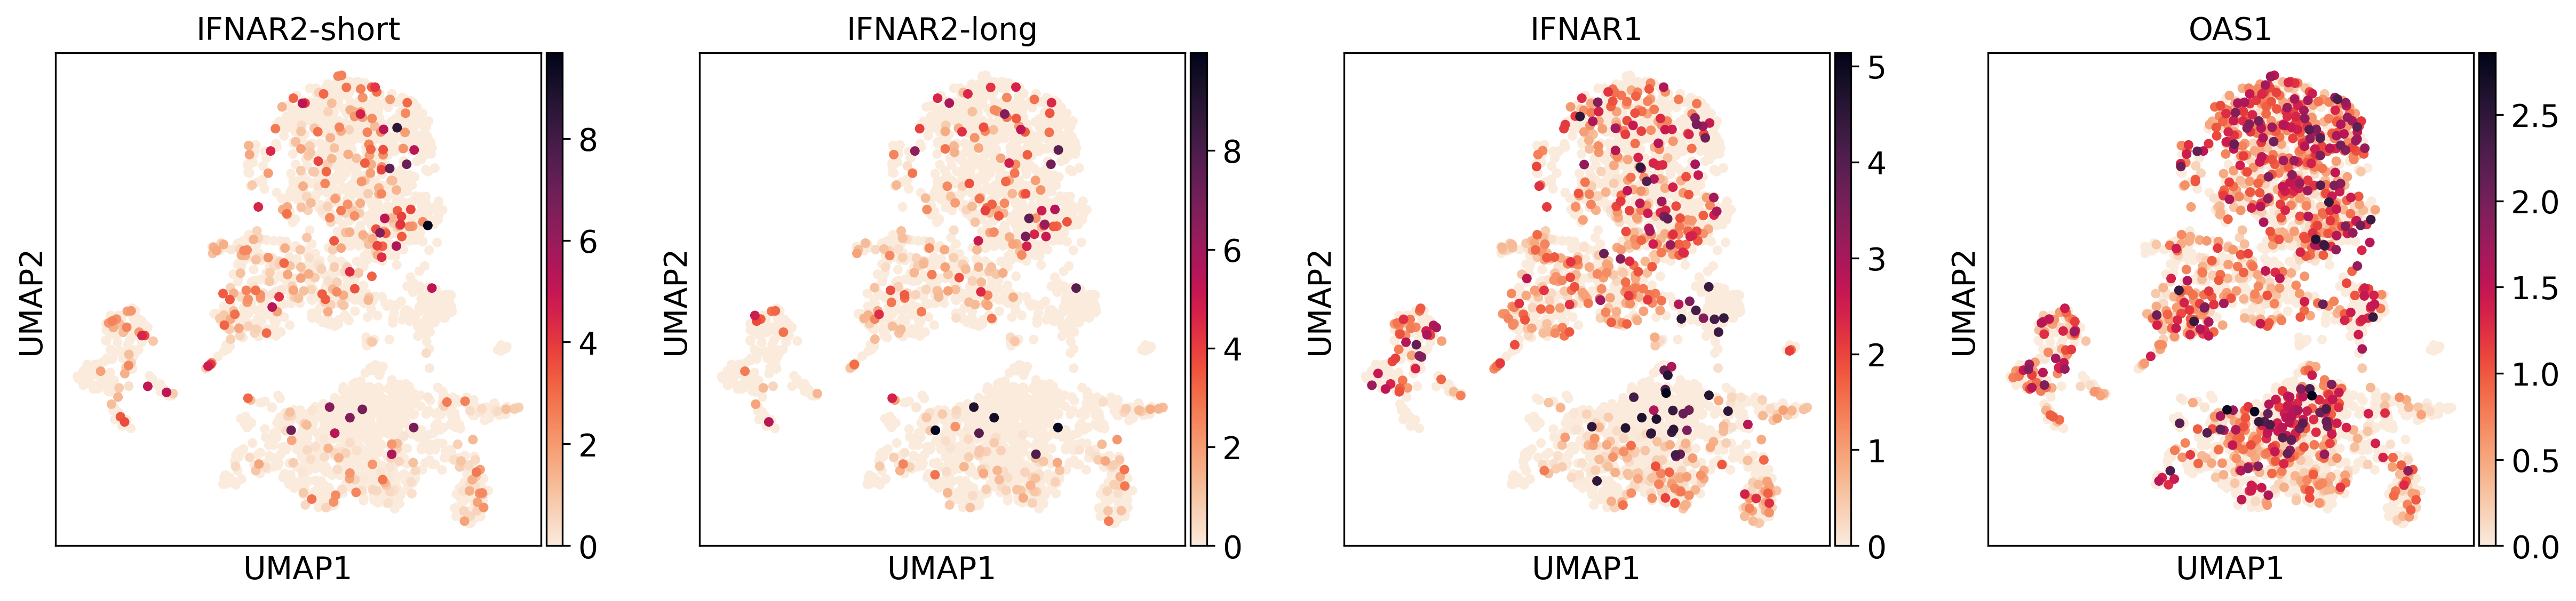

In [137]:
# can also plot the scaled and corrected gene expression by explicitly stating not to use .raw

#sc.pl.umap(adata, use_raw=False)
sc.pl.umap(adata, color=["IFNAR2-short","IFNAR2-long", "IFNAR1","OAS1"], size=75, color_map="rocket_r", vmin=0, use_raw=False)


computing score 'ISG-score'
    finished: added
    'ISG-score', score of gene set (adata.obs).
    12 total control genes are used. (0:00:00)
/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/anndata/_core/anndata.py:1218: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


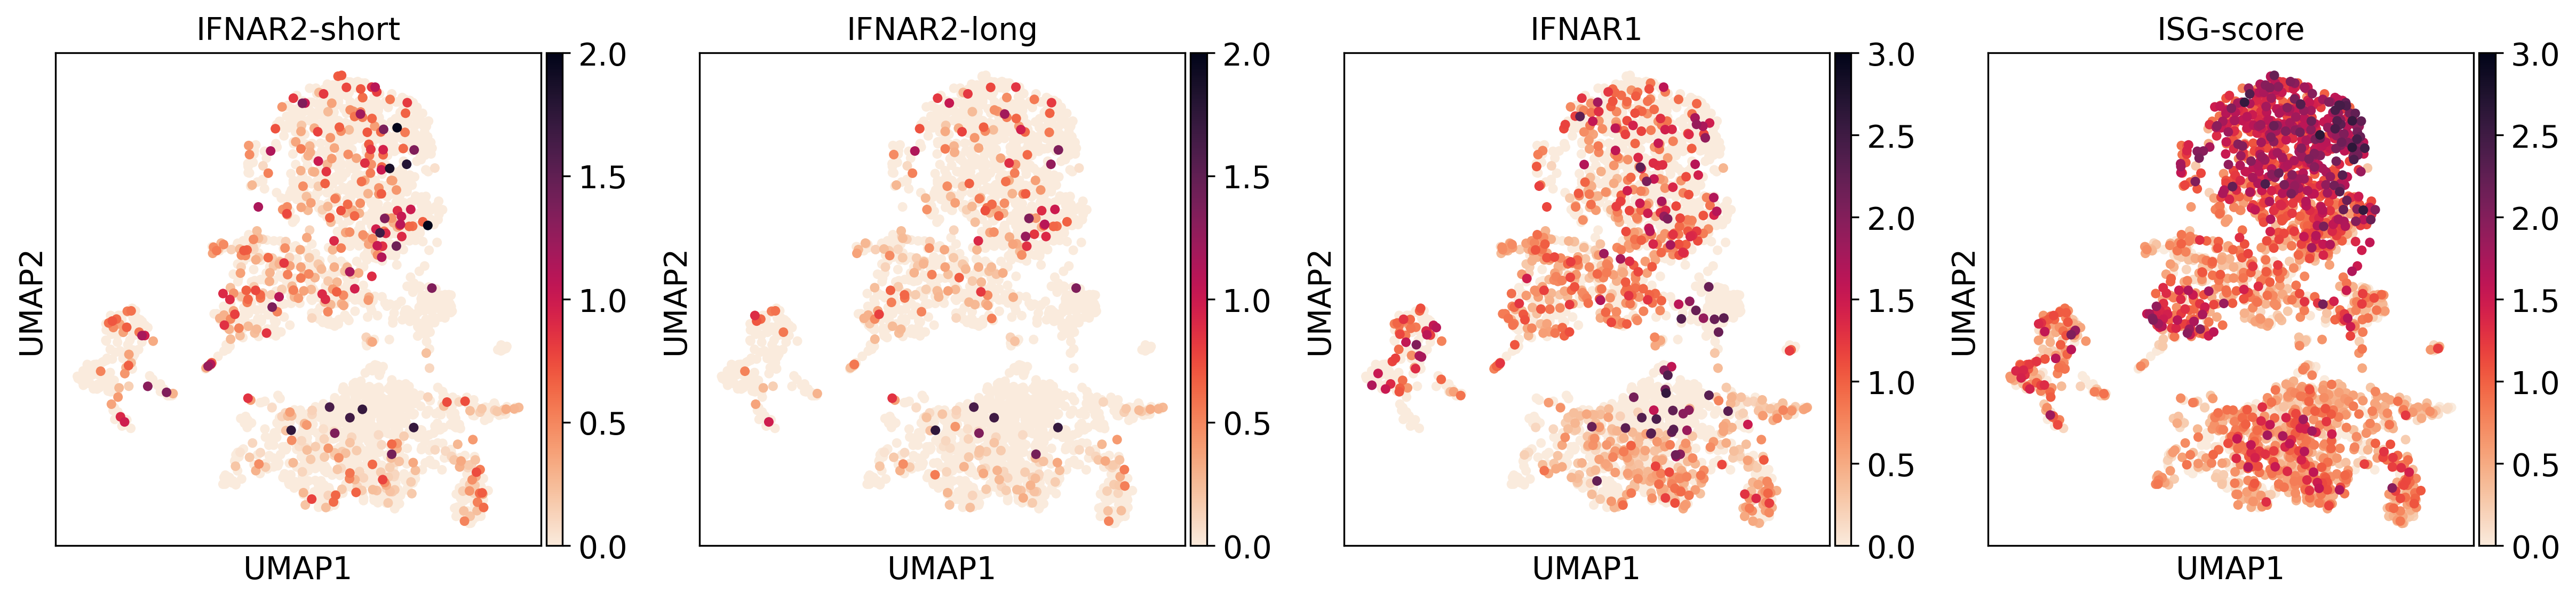

In [138]:
# score ISG genes and replot

# ISG gene list
#MT2A = ENSG00000125148.7
#ISG15 = ENSG00000187608.10
#LY6E = ENSG00000160932.11
#IFIT1 = ENSG00000185745.10
#IFIT2 = ENSG00000119922.11
#IFIT3 = ENSG00000119917.15
#IFITM1 = ENSG00000185885.17
#IFITM3 = ENSG00000142089.17
#IFI44L = ENSG00000137959.17
#IFI6 = ENSG00000126709.16
#MX1 = ENSG00000157601.15
#IFI27 = ENSG00000165949.13

sc.tl.score_genes(adata, ["MT2A", "ISG15", "LY6E", "IFIT1", "IFIT2", "IFIT3", "IFITM1", "IFITM3", "IFI44L", "IFI6", "MX1", "IFI27"], score_name='ISG-score', ctrl_size=12)

# set vmax for each gene separately and use "raw" (normalized, log but uncorrected) counts
#sc.pl.umap(adata, color=["IFNAR2-short","IFNAR2-long", "IFNAR1", "ISG-score"], size=75, color_map="rocket_r", vmin=0, vmax=[2,2,2,3])
sc.pl.umap(adata, color=["IFNAR2-short","IFNAR2-long", "IFNAR1", "ISG-score"], size=75, color_map="rocket_r", vmin=0, vmax=[2,2,3,3])

# to save, add: 
# save="_notScaled_setVmax.pdf"
# e.g. sc.pl.umap(adata, ..., save="_notScaled_setVmax.pdf") 
# or, right click on the plot and "Save Image As..."


computing score 'ISG-score'
    finished: added
    'ISG-score', score of gene set (adata.obs).
    12 total control genes are used. (0:00:00)
/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/anndata/_core/anndata.py:1218: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


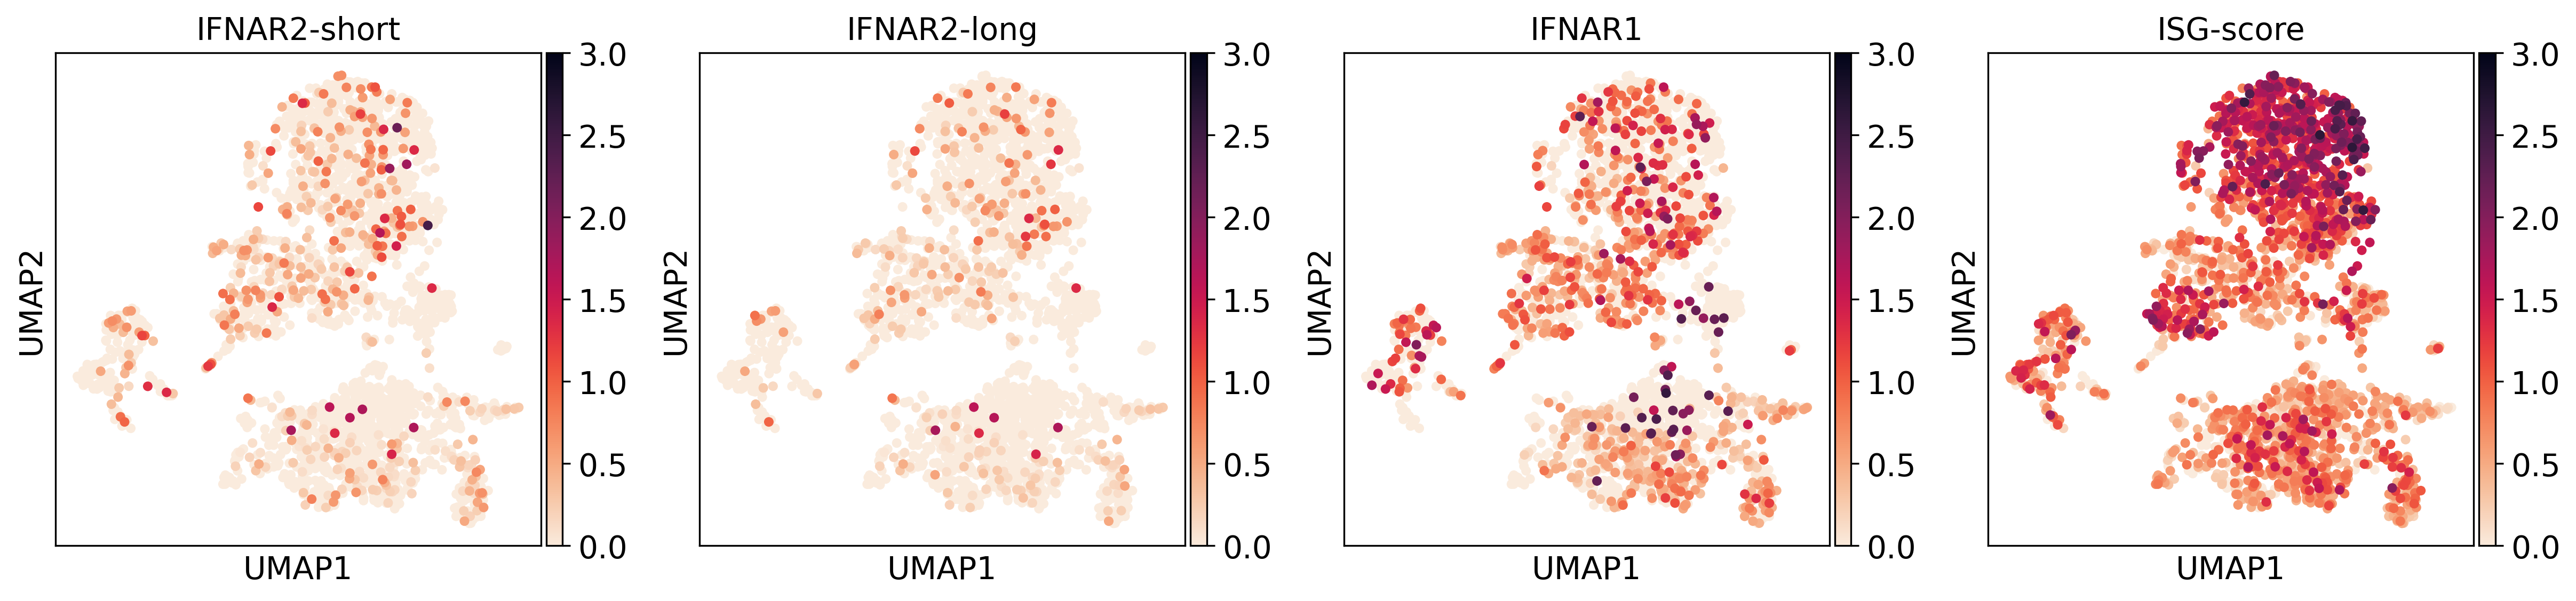

In [139]:
# Use normalized/log counts, but set vmax to be the same

sc.tl.score_genes(adata, ["MT2A", "ISG15", "LY6E", "IFIT1", "IFIT2", "IFIT3", "IFITM1", "IFITM3", "IFI44L", "IFI6", "MX1", "IFI27"], score_name='ISG-score', ctrl_size=12)
sc.pl.umap(adata, color=["IFNAR2-short","IFNAR2-long", "IFNAR1", "ISG-score"], size=75, color_map="rocket_r", vmin=0, vmax=[3,3,3,3])

computing score 'ISG-score'
    finished: added
    'ISG-score', score of gene set (adata.obs).
    72 total control genes are used. (0:00:00)
/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/anndata/_core/anndata.py:1218: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


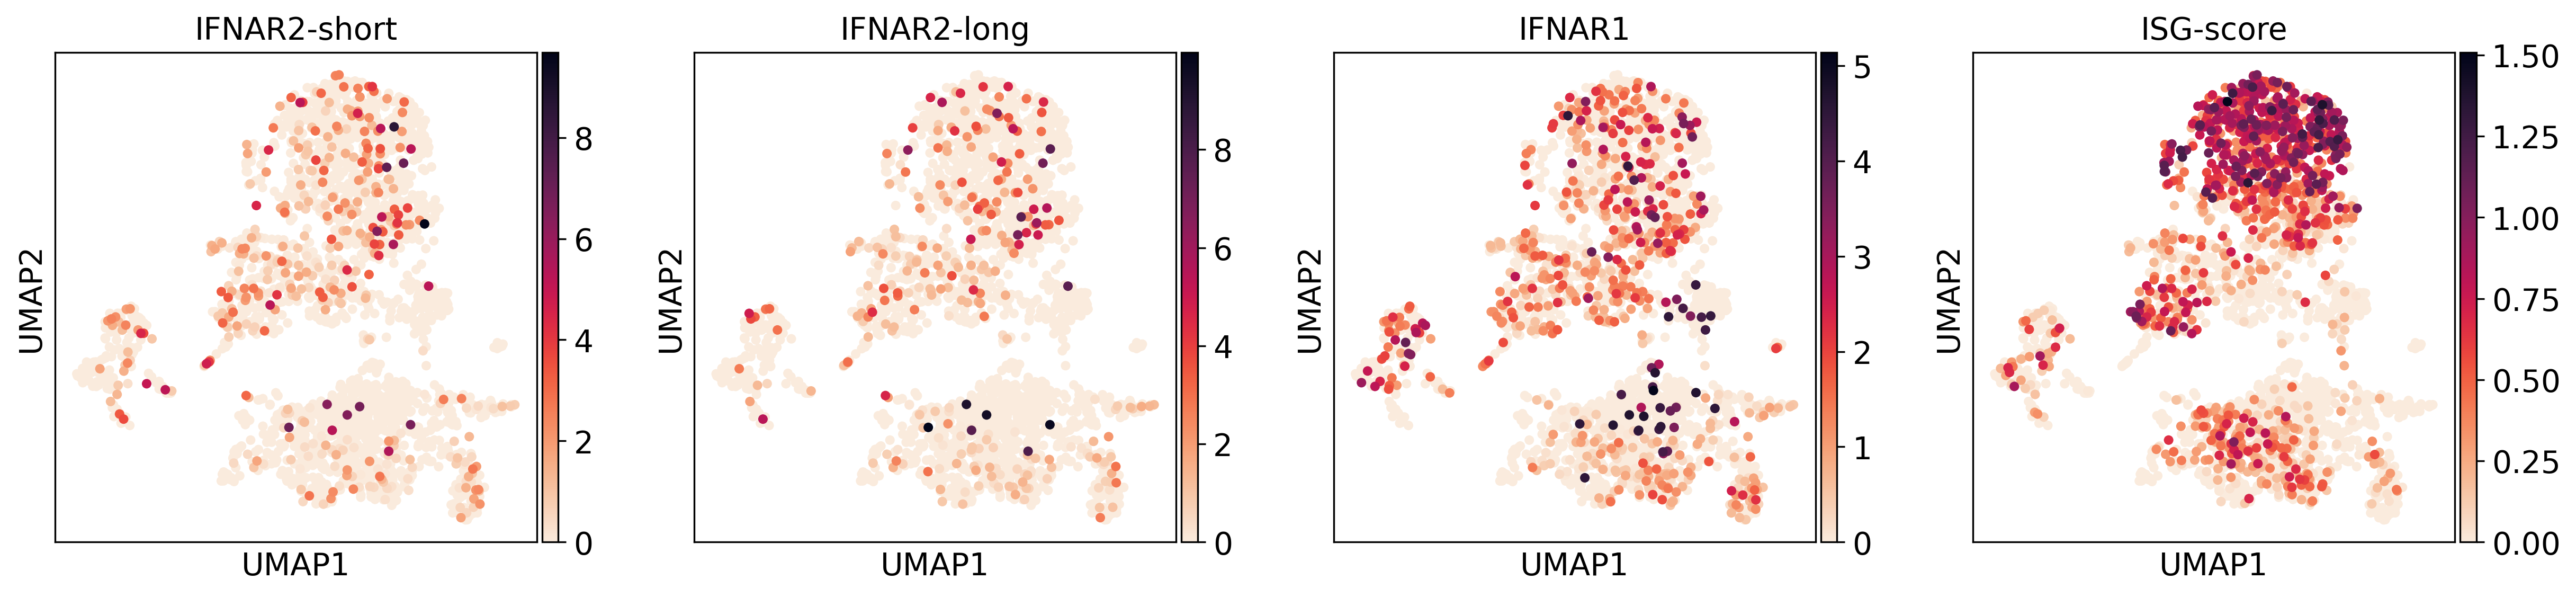

In [140]:
# Use the scaled/corrected data instead

sc.tl.score_genes(adata, ["MT2A", "ISG15", "LY6E", "IFIT1", "IFIT2", "IFIT3", "IFITM1", "IFITM3", "IFI44L", "IFI6", "MX1", "IFI27"], score_name='ISG-score', ctrl_size=12, use_raw=False)

sc.pl.umap(adata, color=["IFNAR2-short","IFNAR2-long", "IFNAR1", "ISG-score"], size=75, color_map="rocket_r", vmin=0, use_raw=False)


/Users/ativ2716/jhub_venv/lib/python3.6/site-packages/anndata/_core/anndata.py:1218: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


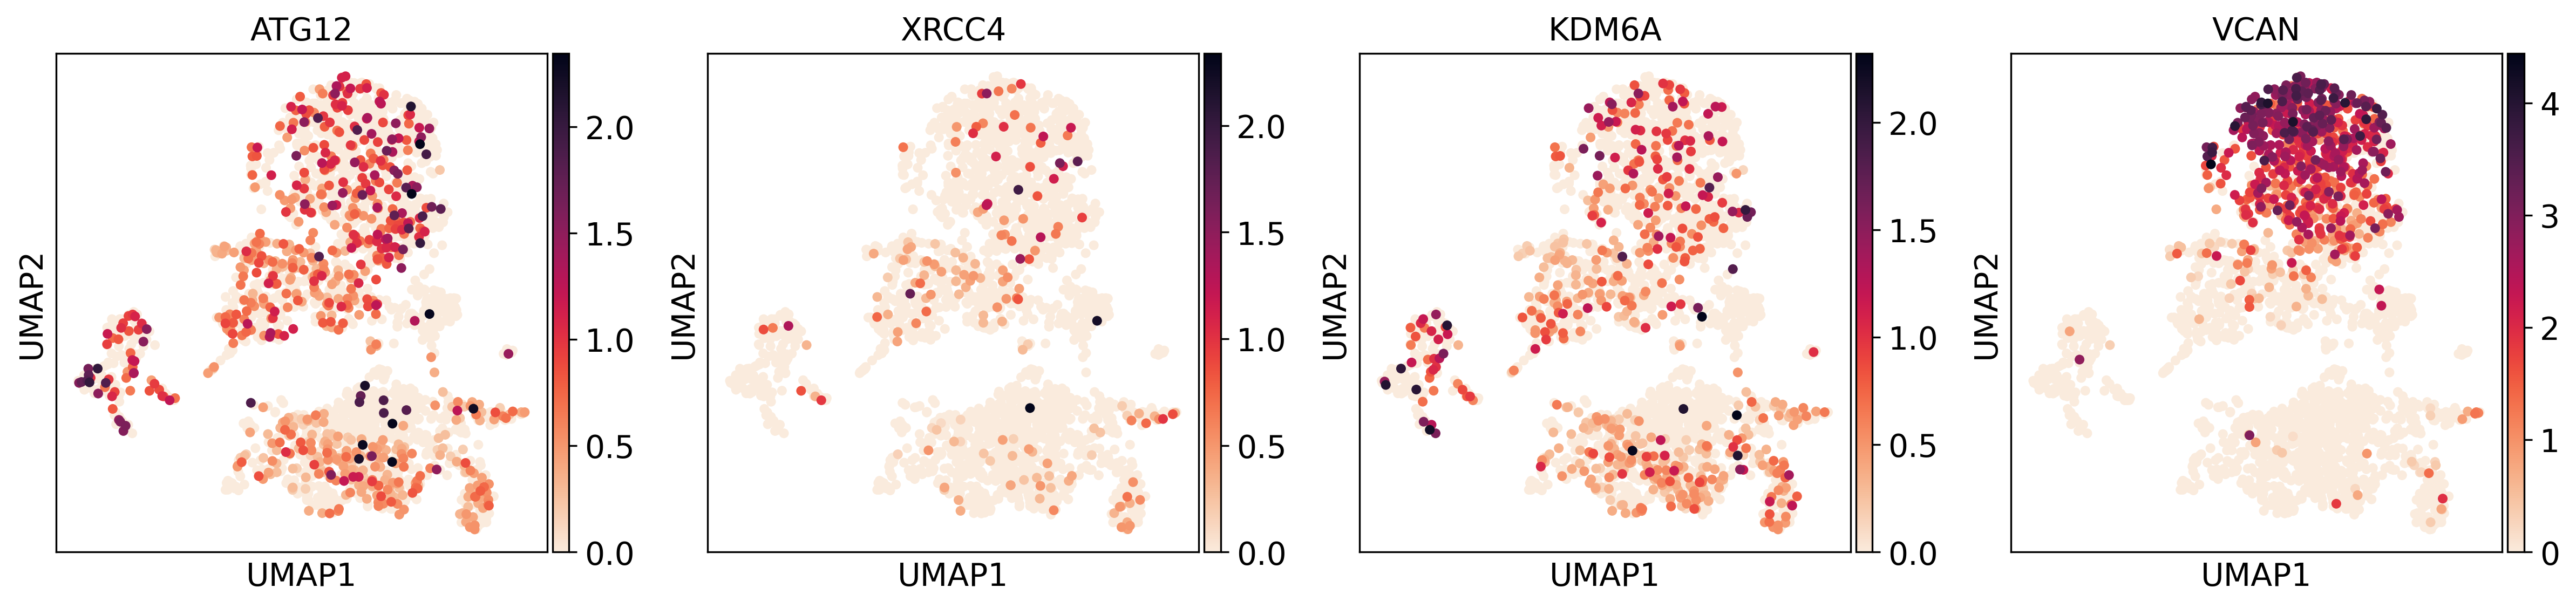

In [143]:
sc.pl.umap(adata, color=["ATG12", "XRCC4", "KDM6A", "VCAN"], size=75, color_map="rocket_r", vmin=0)
